# Module 5: Data Visualisation for Ford Go Bike Data
## Pratik Sanghavi 

In this project, I will attempt to provide some insights into the usage patterns of Ford GoBike bike sharing system covering greater San Francisco Bay Area. Before moving on with the analysis itself, I will first investigate the dataset for the features that are captured so as to gain an idea as to what analysis is possible with the given data. This will be followed up by some data wrangling so as to make the data suitable for our analysis. Finally, we can get started with some visualisations illustrating our observation about the data. Thus we can divide our notebok into the following segments:

1. Wrangle
2. Explore
3. Conclude

<a id='toc'></a>
## Table of Contents 
1. [Wrangle](#wrangle)<br>
&nbsp;1.1 [Gather](#gather)<br>
&nbsp;&nbsp;&nbsp;1.1.1 [Import necessary libraries](#lib)<br>
&nbsp;&nbsp;&nbsp;1.1.2 [Load Data](#load_data)<br>
&nbsp;&nbsp;&nbsp;1.1.3 [High Level Overview of Data](#ovw)<br>
&nbsp;&nbsp;&nbsp;1.1.4 [The Big Idea](#bigidea)<br>
&nbsp;1.2 [Assess](#assess)<br>
&nbsp;&nbsp;&nbsp;1.2.1 [Quality](#qual)<br>
&nbsp;1.3 [Clean](#clean)<br>
2. [Explore](#explore)<br>
&nbsp;2.1 [Univariate Exploration of Data](#univariate)<br>
&nbsp;&nbsp;&nbsp;2.1.1 [Bike sharing patterns by week](#weekpattern)<br>
&nbsp;&nbsp;&nbsp;2.1.2 [Bike sharing patterns by day](#daypattern)<br>
&nbsp;&nbsp;&nbsp;2.1.3 [Bike sharing patterns by hour](#hourpattern)<br>
&nbsp;&nbsp;&nbsp;2.1.4 [Age distribution of Users](#agedist)<br>
&nbsp;&nbsp;&nbsp;2.1.5 [Number of Bikes](#nbikes)<br>
&nbsp;&nbsp;&nbsp;2.1.6 [Proportion of Users of each Gender](#gender_count)<br>
&nbsp;2.2 [Bivariate Exploration of Data](#bivariate)<br>
&nbsp;&nbsp;&nbsp;2.2.1 [Type of User and Duration of Use](#usertripduration)<br>
&nbsp;&nbsp;&nbsp;2.2.2 [Gender of User and Duration of Use](#genderduration)<br>
&nbsp;&nbsp;&nbsp;2.2.3 [Use by Hour by Different Genders](#hourgender)<br>
&nbsp;&nbsp;&nbsp;2.2.4 [Bike Stocks by Week for Different Locations](#bikestocks)<br>
&nbsp;&nbsp;&nbsp;2.2.5 [Weekday and Weekend Renting Behavior of Customers and Subscribers](#weekdayusertype)<br>
&nbsp;&nbsp;&nbsp;2.2.6 [Day Renting Behavior of Customers and Subscribers](#dayusertype)<br>
&nbsp;&nbsp;&nbsp;2.2.7 [Locations of Sites during Weekdays and Weekends](#locationbyday)<br>
&nbsp;2.3 [Multivariate Exploration of Data](#multivariate)<br>
&nbsp;&nbsp;&nbsp;2.3.1 [User Type Duration by Hour](#udurationhour)<br>
&nbsp;&nbsp;&nbsp;2.3.2 [User Type Duration by Day](#udurationday)<br>
&nbsp;&nbsp;&nbsp;2.3.3 [Age Duration by Day](#agedurationday)<br>
3. [Conclude](#conclude)<br>
&nbsp;3.1 [Explanatory Analysis](#explain)<br>
&nbsp;&nbsp;&nbsp;3.1.1 [Work and Leisure Use Patterns Identified from Data](#workandleisure)<br>
&nbsp;&nbsp;&nbsp;3.1.2 [Bike Stockpiles Across Most Frequent Stations during the Month](#bikestockpile)<br>

<a id='wrangle'></a>
# 1. [Wrangle](#toc)
Here we will
- Gather
- Assess
- Clean <br>
the data with the objective to make it suitable for processing by the subsequent sections. One important thing to heed here is that we might just draw some prelimnary insights to set our heading but the predominant analysis will be from the `Explore` and `Conclude` sections. Who knows? We might just get lucky and hit bullseye in the first section itself.  

<a id='gather'></a>
## 1.1 [Gather](#toc)
The data has already been gathered and stored in `201902-fordgobike-tripdata.csv`. This section might just be one of the shortest sections of the project! All we have to do is load our data onto a dataframe and bam! - we have our data.

<a id='lib'></a>
### 1.1.1 [Import Necessary Libraries](#toc)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='load_data'></a>
### 1.1.2 [Load data](#toc)
In this section, we will load the data for the given dataset to a dataframe - `df_bike_sharing`. We will also observe the different features so as to understand what we could be doing with the data. Note that here, we'll only be skimming over the data. The actual analysis and observations are more suitable to be captured in the `Exploratory Analysis` phase of the project. 

In [84]:
df_bike_sharing = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='ovw'></a>
### 1.1.3 [High Level Overview of Data](#toc)
In this section, we seek to observe the data given. What are the features given? Are there any missing values? What are the datatypes of the features captured? Some basic measures of centre and spread are also explored (some of them might not make sense such as those of id's but hey! - this is just the beginning. The future holds promise for us to improve!)

In [85]:
# Columns, non null values and their data type
display(df_bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

None

In [86]:
display(df_bike_sharing.head())

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


We can see that there is missing data in some of the station relevant columns as well as in the birth year and gender related columns. <br>
It may be prudent to drop all rows with missing observations, since the dataset is pretty expansive and the analysis won't suffer from a few hundred observations.

In [87]:
# Statistical measures for numeric columns
display(df_bike_sharing.describe())

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


This table alongwith the one above helps us formulate the subject for our analysis that we will attempt to answer throughout the rest of the notebook.

<a id='bigidea'></a>
### 1.1.4 [The Big Idea!💡](#toc)
There can be several questions we can answer from the given data. Here we'll be looking at:-
1. Changes in the ride characteristic between a subscriber and a customer.
2. Most frequent routes across the dataset. This might offer some clue into how the company might bikes stock at different locations to better service demand.
3. Bike sharing and correlation with ride characteristics.
4. Time of the month and frequency of bike rentals. Here we can also examine how mean duration varies across different days 
5. Examining variation of bike stocks at different locations across the month. Here 0 might be assumed as the baseline before seeing how bikes leave or arrive at the particular station.

#### The main feature(s) of interest in the dataset:-
1. Usage pattern of user types across the day, week and weekday and weekend
2. Accumulation and deficit of bikes at different stations across the month (week-wise)
3. Usecases of different users
4. Age distribution of of our users
5. Duration of use across different user types, genders, ages
6. Presence of special destinations in case of leisure vs routine travel

####  Features in the Dataset that will support our investigation into our feature(s) of interest:-
1. `start_time`, `end_time`
2. `user_type`
3. `member_gender`, `member_birth_year`
4. `start_station_name`, `end_station_name`
5. `start_station_latitude`,`start_station_longitude`,`end_station_latitude`, `end_station_longitude`

<a id='assess'></a>
## 1.2 [Assess](#toc)
I will create the common segment where the quality and tidiness issues will be stacked. This will be the single place we'll be returning to in case we want to refer issues later on.

<a id='qual'></a>
### 1.2.1 [Quality](#toc)
- [x] `start_station_id`, `start_station_name`, `end_station_id` and `end_station_name` have a few hundred missing values. ~~We need to check if the latitude longitude data can give us information on the station at those coordinates~~. It might be possible that no station exists there in which case we can simply proceed to drop these (although they could have made for an important analysis concerning behavior of users and likelihood of not leaving the bike at designated sites!)
- [x] `member_birth_year` and `member_gender` of users has missing values. ~~We can simply drop these rows.~~
- [x] `start_time` and `end_time` are not the correct datatype. They need to be converted to the appropriate datatype (datetime)
- [x] ~~`duration_sec` needs to be checked in order to confirm that the column is correctly calculated. If not, the appropriate correction should be made.~~

In [88]:
# Issue 1: Missing station names in start and end columns
# Maintain a dictionary of latitude and longitude mapping to name of station
# Check if missing value latitude and longitude are present in the keys of the dictionary
# If present, then we can use the value of that key value pair 
def index_null(df_bike_sharing, col_missing):
    """ This function returns index of null values in a column"""
    return list(df_bike_sharing[df_bike_sharing[col_missing].isnull()].index)

def coordinate_place_mapping(df_bike_sharing):
    """ This function maps latitude and longitude to stations"""
    map_dict = {}
    df_bike_sharing_start_filter = df_bike_sharing.dropna(subset=['start_station_name']).reset_index()
    df_bike_sharing_end_filter = df_bike_sharing.dropna(subset=['end_station_name']).reset_index()
    for i in range(0,df_bike_sharing_start_filter.shape[0]):
        start_lat = df_bike_sharing_start_filter.loc[i,'start_station_latitude']
        start_long = df_bike_sharing_start_filter.loc[i,'start_station_longitude']
        start_station = df_bike_sharing_start_filter.loc[i,'start_station_name']
        if (start_lat, start_long) not in map_dict.keys():
            map_dict[(start_lat, start_long)] = start_station
    
    for i in range(0,df_bike_sharing_end_filter.shape[0]):
        end_lat = df_bike_sharing_end_filter.loc[i,'end_station_latitude']
        end_long = df_bike_sharing_end_filter.loc[i,'end_station_longitude']
        end_station = df_bike_sharing_end_filter.loc[i,'end_station_name']
        if (end_lat, end_long) not in map_dict.keys():
            map_dict[(end_lat, end_long)] = end_station

    return map_dict

def fillable_stations(df_bike_sharing, col_missing, map_dict):
    """ This function returns number of stations that can be filled using coordinates in the dictionary """
    res = 0
    indexes = index_null(df_bike_sharing, col_missing) 
    for index in indexes:
        start_lat = df_bike_sharing.loc[index,col_missing[0:-5] + '_latitude']
        start_long = df_bike_sharing.loc[index,col_missing[0:-5] + '_longitude']
        if (start_lat, start_long) in map_dict.keys():
            res = res + 1
    return res

map_dict = coordinate_place_mapping(df_bike_sharing)
# Now we can iterate over the coordinates in the missing value rows and check if we can fill any row
start_fillable = fillable_stations(df_bike_sharing, 'start_station_name', map_dict)
print("Number of station names that can be filled in the \"start_station_name\" column: {}".format(start_fillable))
end_fillable = fillable_stations(df_bike_sharing, 'end_station_name', map_dict)
print("Number of station names that can be filled in the \"end_station_name\" column: {}".format(end_fillable))

Number of station names that can be filled in the "start_station_name" column: 0
Number of station names that can be filled in the "end_station_name" column: 0


As can be seen from the above code block, the coordinates map to an unknown location. For future analysis, it is worth noting that if the occurence of these incidences increase, it can be instructive to analyse what influences these drops since we want to prevent these as much as possible.<br>
For now however, we will proceed to drop these rows.

In [89]:
# Issue 2: Missing birth years and genders
df_bike_sharing[['member_birth_year','member_gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   member_birth_year  175147 non-null  float64
 1   member_gender      175147 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


Quite a lot of values are missing here! We may as well retain these rows where we do not wish to analyse these features and drop them when needed. We can't afford to drop ~8000 observations.

In [90]:
# Issue 3: Datatype of start and end time columns
print("The datatype of \"start_time\" column: {}".format(type(df_bike_sharing['start_time'][0])))
print("The datatype of \"end_time\" column: {}".format(type(df_bike_sharing['end_time'][0])))

The datatype of "start_time" column: <class 'str'>
The datatype of "end_time" column: <class 'str'>


Conversion to datetime datatype will yield a lot of benefits to us in our analysis enabling us to extract months from the time columns amongst other things. 

In [91]:
# Issue 4: Checking if duration is captured correctly
duration_in_seconds = np.floor((pd.to_datetime(df_bike_sharing['end_time']) - pd.to_datetime(df_bike_sharing['start_time'])).dt.total_seconds())
print("Number of incorrectly calculated duration in seconds: {}".format((duration_in_seconds != df_bike_sharing['duration_sec']).sum()))

Number of incorrectly calculated duration in seconds: 0


<a id='clean'></a>
## 1.3 [Clean](#toc)
Gather-Assess-Clean is an iterative process. So we might have returned to this segment several times. Here we will transform the data appropriately so as to change our data to a form that would be more conducive for our study. 

**Define**<br>
Missing station data in start and end columns need to be dropped.

**Code**

In [92]:
df_bike_sharing_clean = df_bike_sharing.dropna(subset=['start_station_name','end_station_name'])

**Test**

In [93]:
df_bike_sharing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

We have thus dropped rows with missing values for `start_station_name`(and id) and `end_station_name`(and id again).

**Define** <br>
`start_time` and `end_time` to be converted to datetime datatype

**Code**

In [94]:
df_bike_sharing_clean.start_time = pd.to_datetime(df_bike_sharing_clean.start_time)
df_bike_sharing_clean.end_time = pd.to_datetime(df_bike_sharing_clean.end_time)

c:\users\sangh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Test**

In [95]:
df_bike_sharing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

Thus we have transformed the `start_time` and `end_time` columns to an appropriate datatype

<a id='explore'></a>
# 2. [Explore](#toc)
> *Enjoy the little detours..because that's where you will find the things that are more important than you want*

In this section, we will explore some of the data that we have gathered to obtain some degree of familiarity and build intuition towards what we can expect to state about the data. While we have already laid a general direction towards which we want to head, it should be intructive to observe the patterns in data and arrive at better questions in the process

<a id='univariate'></a>
## 2.1 [Univariate Exploration](#toc)

**Question:** What are the patterns of bike use during the month with respect to day, week, hour, etc?

<a id='weekpattern'></a>
### 2.1.1 [Bike sharing patterns by week](#toc)

In [96]:
#Frequency of bike sharing by week
freq_bike = df_bike_sharing_clean.start_time.dt.isocalendar().week.value_counts().sort_index()
freq_bike = freq_bike.reset_index().drop(columns = 'index')
display(freq_bike)

,week
0,12198
1,45280
2,42431
3,53376
4,29930


A bar plot here would be in order since we have discretised the month into weeks

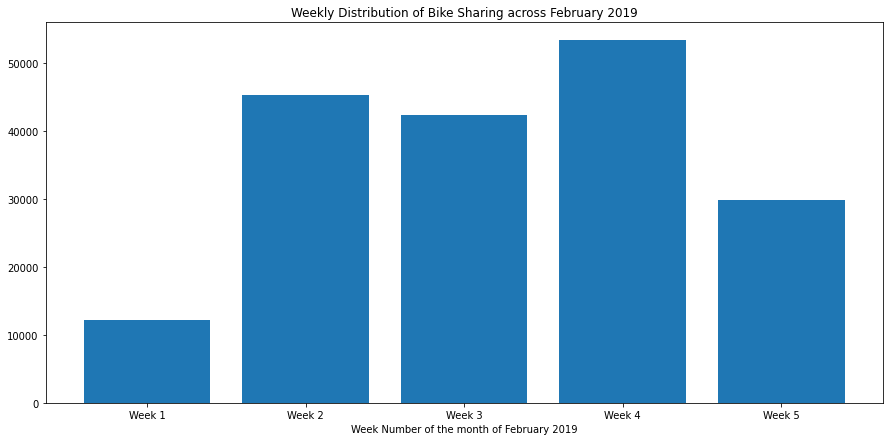

In [97]:
plt.figure(figsize = [15,7])

plt.bar(x = freq_bike.index, height = freq_bike.week);
plt.xlabel("Week Number of the month of February 2019");
plt.xticks([0,1,2,3,4], ['Week 1','Week 2','Week 3','Week 4','Week 5']);

plt.title("Weekly Distribution of Bike Sharing across February 2019");

Here we can clearly observe that in the first and last week of the month demand for bikes has been poor while week 4 has raked in maximum trips

<a id = 'daypattern'></a>
### 2.1.2 [Bike Sharing patterns by day](#toc)

In [98]:
#Frequency of bike sharing by day

freq_bike = df_bike_sharing_clean.start_time.dt.day_name().value_counts()
freq_bike = freq_bike.reset_index()
freq_bike.rename(columns = {'index': 'Day','start_time':'Day_Ride_Count'}, inplace = True)

weekdays = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = freq_bike['Day'].map(mapping)

freq_bike = freq_bike.iloc[key.argsort()].reset_index().drop(columns = 'index')
display(freq_bike)

,Day,Day_Ride_Count
0,Monday,26807
1,Tuesday,31781
2,Wednesday,29609
3,Thursday,35176
4,Friday,28962
5,Saturday,15377
6,Sunday,15503


Here again a bar plot makes sense to capture the distribution of rentals on basis of the day

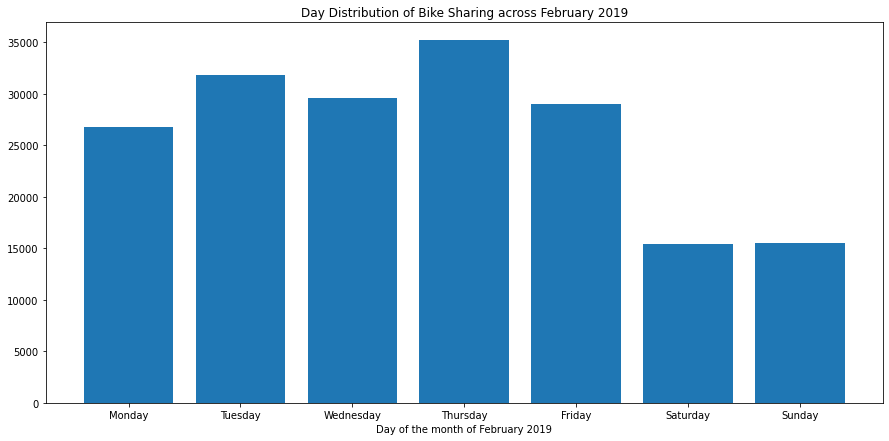

In [99]:
plt.figure(figsize = [15,7])

plt.bar(x = freq_bike.Day, height = freq_bike.Day_Ride_Count);
plt.xlabel("Day of the month of February 2019");

plt.title("Day Distribution of Bike Sharing across February 2019");

Clearly, fewer rides are taken on the weekends. This offers an interesting insight into our consumer base. Perhaps our users are predominantly office goers or students who bike to work? Though the data currently does not offer much information regarding this (other than one crude way of estimation which is to observe the age distribution of our user base and also figure out the demand by hour), this could form the basis for the next data collection.

<a id = 'hourpattern'></a>
### 2.1.3 [Bike sharing patterns by hour](#toc)

In [100]:
freq_hour_bike = df_bike_sharing_clean.start_time.dt.hour.value_counts().sort_index()
freq_hour_bike = freq_hour_bike.reset_index().drop(columns = 'index')
freq_hour_bike.rename(columns={'start_time':'hour_start'}, inplace=True)
display(freq_hour_bike)

,hour_start
0,925
1,548
2,380
3,174
4,235
5,896
6,3484
7,10610
8,21041
9,15886


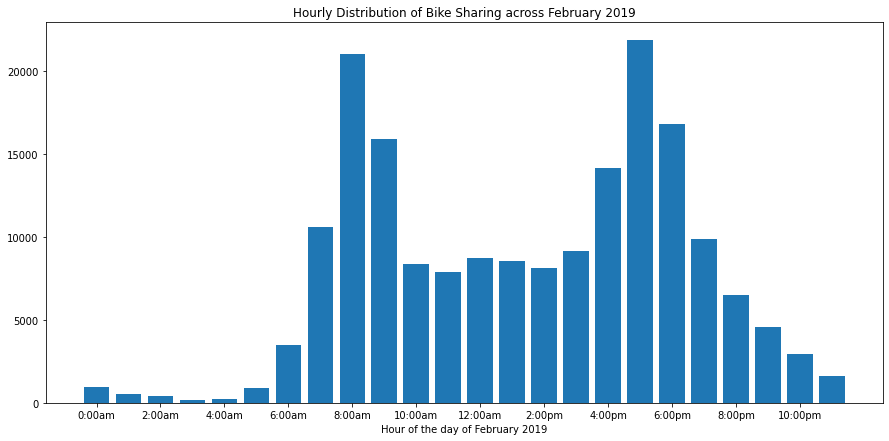

In [101]:
plt.figure(figsize = [15,7])

plt.bar(x = freq_hour_bike.index, height = freq_hour_bike.hour_start);
plt.xlabel("Hour of the day of February 2019");
ticks = range(0,24, 2)
tick_labels = [str(tick) + ":00am" if tick<=12 else str(tick-12) + ":00pm" for tick in ticks]
plt.xticks(ticks, tick_labels, rotation = 0)
plt.title("Hourly Distribution of Bike Sharing across February 2019");

It is clearly visible that the demand for bikes spikes during rush hours and reduces during off-hours implying that our users might be employees.

**Question:** What is the distribution of our user with respect to age, gender?

<a id='agedist'></a>
### 2.1.4 [Age distribution of Users](#toc)

Two important points to keep in mind here:-
1. Drop the rows with missing data for age
2. Drop ages above 100 years of age (no I'm not saying they can't! Its just....improbable. Anyways we're not losing a lot of data by dropping all users 'claiming' to be above 80 years of age. Perhaps the only data we can trust is from our bikes.)
2. Use unique users for figuring out distribution. Since there is no identifier for users in the dataset, we will assume that proportion of rides is constant for all users (which may not be correct but it is the best we can manage with the given data)  

In [102]:
# retain only those rows with non null values for member_birth_year
df_bike_sharing_age = df_bike_sharing_clean[df_bike_sharing_clean['member_birth_year'].notnull()].reset_index()

# now compute the age of users. Store in a new column 'member_age'. Since data taken in 2019, this is what will be used for calculation of age
df_bike_sharing_age['member_age'] = 2019 - df_bike_sharing_age['member_birth_year']

df_bike_sharing_age = df_bike_sharing_age[df_bike_sharing_age.member_age <=80].reset_index().drop(columns = ['level_0','index'])
bins = np.arange(df_bike_sharing_age.member_age.min(), df_bike_sharing_age.member_age.max()+3, 3)
df_bike_sharing_age['age_bin'] = pd.cut(df_bike_sharing_age.member_age, bins,)

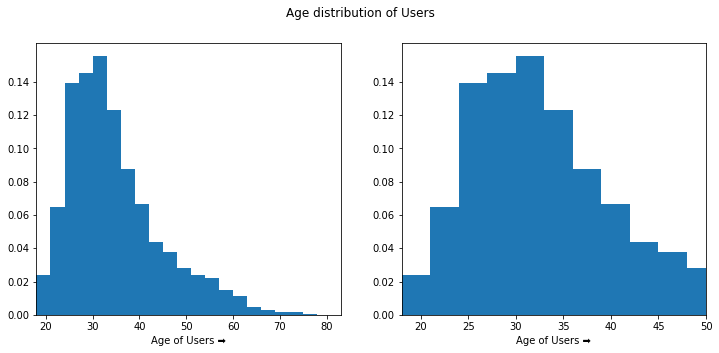

In [103]:
max_prop_age = df_bike_sharing_age.age_bin.value_counts()[0]/df_bike_sharing_age.age_bin.value_counts().sum()
tick_props = np.arange(0, max_prop_age, 0.02)
tick_names = ['{:.2f}'.format(v) for v in tick_props]

def histogram(df_bike_sharing_age, x, bins, xlim_upper, xlabel, tick_props, tick_names):
    """Function for plotting histogram with parameters and ticks defined"""
    plt.hist(data=df_bike_sharing_age, x = x, bins = bins);
    plt.xlim(df_bike_sharing_age.member_age.min(), xlim_upper);
    plt.xlabel(xlabel);
    plt.yticks(tick_props*df_bike_sharing_age.age_bin.value_counts().sum(), tick_names);

plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
histogram(df_bike_sharing_age, 'member_age', bins, 83, 'Age of Users ➡', tick_props, tick_names)

plt.subplot(1,2,2)
histogram(df_bike_sharing_age, 'member_age', bins, 50, 'Age of Users ➡', tick_props, tick_names)

plt.suptitle("Age distribution of Users");

In [104]:
max_prop_age = df_bike_sharing_age.age_bin.value_counts()[0:6].sum()/df_bike_sharing_age.age_bin.value_counts().sum()
print("We can see that the proportion of users between 21-39 years of age is {:.2f}%".format(100*max_prop_age))

We can see that the proportion of users between 21-39 years of age is 72.63%


We can quickly observe that a majority of our users are between 21 and 39 years of age. This seems to coincide with the intuitive age for office workers. It is very well possible that we may have figured out an important characteristic about our users with the limited information we have at hand.

<a id='nbikes'></a>
### 2.1.5 [Number of bikes](#toc) 
Although this isn't exactly a univariate exploration of data, the number of bikes should offer important information about the dataset. If only we had the number of unique users😥. We could have calculated the number of users per bike.

In [105]:
print("The number of bikes are {}".format(df_bike_sharing_clean.bike_id.nunique()))

The number of bikes are 4618


<a id='gender_count'></a>
### 2.1.6 [Proportion of Users by Gender](#toc)

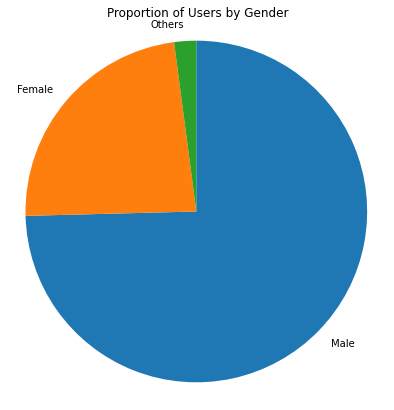

In [106]:
plt.figure(figsize = [7,7])
plt.pie(df_bike_sharing_clean.member_gender.value_counts(), labels = ['Male', 'Female', 'Others'], startangle=90, counterclock=False);
plt.title("Proportion of Users by Gender");
plt.axis('square');

<a id='bivariate'></a>
## 2.2 [Bivariate Exploration](#toc)

**Question:** How does duration of use vary with different user, gender groups?

<a id='usertripduration'></a>
### 2.2.1 [Type of User and Duration of Use](#toc)
We can be looking at a bivariate plot of `user_type` and `duration`. Since `user_type` is a categorical datatype, we can compare the averages of the duration each type uses bikes for.  

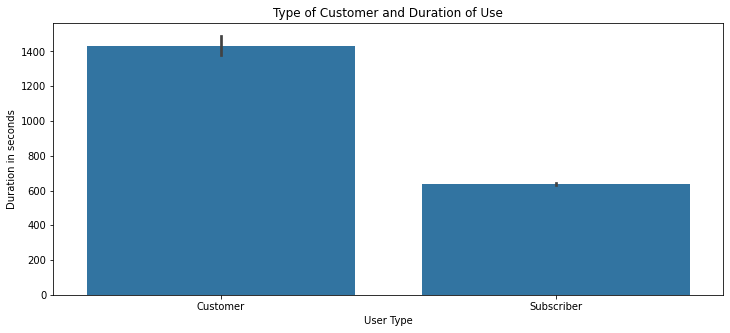

In [107]:
plt.figure(figsize = [12,5])
def barplot(df_bike_sharing_clean, x, y, xlabel, ylabel, title):
    """Generate and display barplot with given parameters"""
    base_color = sb.color_palette()[0]
    sb.barplot(data=df_bike_sharing_clean, x = x, y = y, color = base_color);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);    

barplot(df_bike_sharing_clean, 'user_type','duration_sec', 'User Type', 'Duration in seconds','Type of Customer and Duration of Use')

As can be seen customers are seen to go on longer trips than subscribers. However, subscribers have a much smaller (95%) confidence intervals implying that the customer trip duration is more erratic than the subscriber duration. Perhaps our subscribers use our service for daily commute whereas our customers are prone to use bikes for leisure travel? We can explore this in the multivariate section where we can plot customer type, day and duration in one clustered bar plot.

<a id='genderduration'></a>
### 2.2.2 [Gender of User and Duration](#toc)

We can be looking at a bivariate plot of `member_gender` and `duration`. Since `member_gender` is a categorical datatype, we can compare the averages of the duration each type uses bikes for.

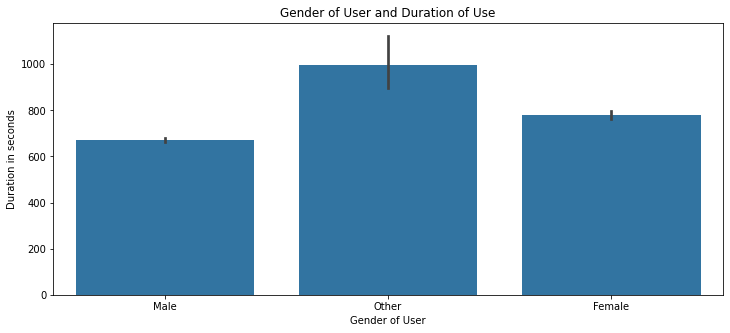

In [108]:
plt.figure(figsize = [12,5])
barplot(df_bike_sharing_clean, 'member_gender','duration_sec', "Gender of User", "Duration in seconds",'Gender of User and Duration of Use')

Females appear to rent bikes for a slighter longer duration than males while users not identifying with either of the two genders seem to be biking for longer distances though the large confidence interval suggests that we may not have as many other users in comparison to male and female users that might make this result somewhat less significant.

**Question** How do different genders use bikes at different hours of the day?

<a id='hourgender'></a>
### 2.2.3 [Use by Hour by Different Genders](#toc)

In [109]:
df_bike_sharing_hour = df_bike_sharing_clean.copy()
df_bike_sharing_hour['Hour'] = df_bike_sharing_hour.start_time.dt.hour
freq_by_gender_hour = df_bike_sharing_hour.groupby(['Hour','member_gender']).size().reset_index()
freq_by_gender_hour.columns = ['hour','gender','count']

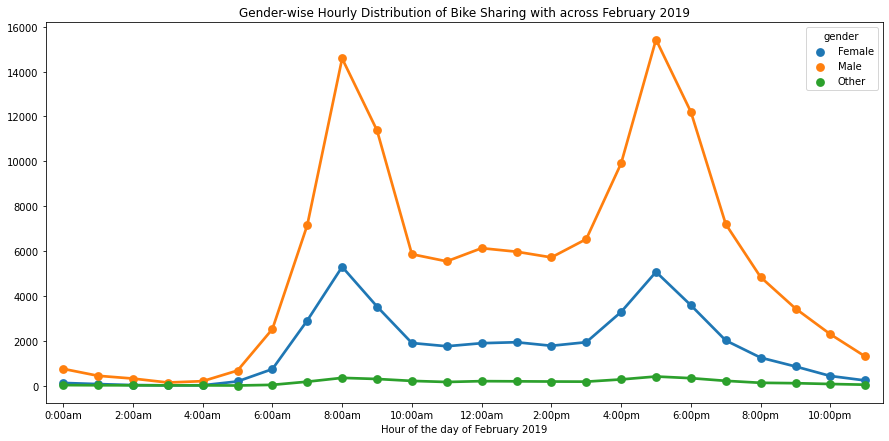

In [110]:
def pointplot(size,freq_by_gender_hour, x, y, hue, xlabel, ylabel, ticks, tick_labels, scale, title):
    """ Create a pointplot with given parameters """
    plt.figure(figsize = size)
    sb.pointplot(data=freq_by_gender_hour,x = x, y = y, hue = hue);
    plt.xlabel(xlabel);
    plt.xticks(ticks, tick_labels);
    plt.title(title);
    plt.ylabel(ylabel);
    plt.yscale(scale);

ticks = range(0,24, 2)
tick_labels = [str(tick) + ":00am" if tick<=12 else str(tick-12) + ":00pm" for tick in ticks]

pointplot([15,7], freq_by_gender_hour, 'hour', 'count', 'gender', "Hour of the day of February 2019", '',ticks, tick_labels, 'linear', "Gender-wise Hourly Distribution of Bike Sharing with across February 2019")

This helps us better see the trends in the data with respect to the bike renting patterns of different genders during the day. The graph is bimodal for both males and females. Others doesn't seem to have sufficient observations to be perceptible on the same scale as males and females. We can use a log scale to aid our analysis

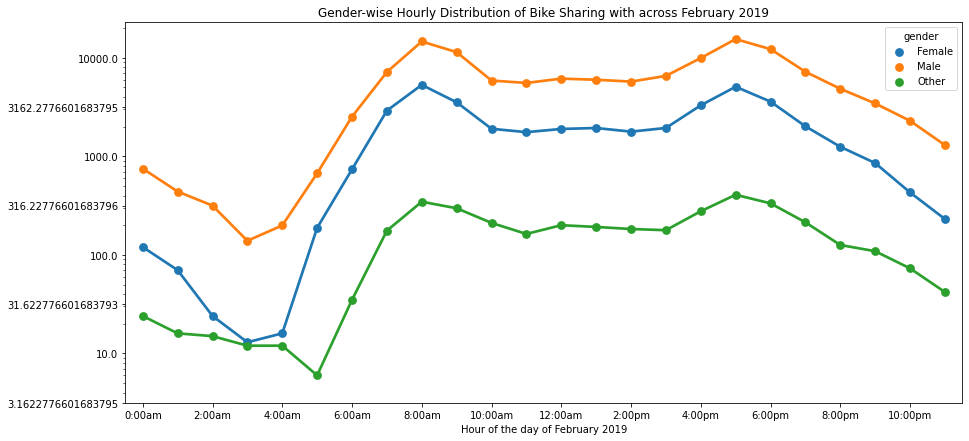

In [111]:
pointplot([15,7], freq_by_gender_hour, 'hour', 'count', 'gender', "Hour of the day of February 2019", '',ticks, tick_labels, 'log', "Gender-wise Hourly Distribution of Bike Sharing with across February 2019")

yticks = np.arange(0.5, 4.5, 0.5)
plt.yticks(np.power(10,yticks), np.power(10,yticks));

And we were correct! All three graphs peak during the rush hours. Since currently we don't have a large enough proportion of other users, we can refer to the log scale graph to view it on the same scale as the two more common genders.

**Question:** How do bike stocks vary by week at different stations during the month?

<a id='bikestocks'></a>
### 2.2.4 [Bike Stocks by Week for Different Locations](#toc)

In this section, we want to compute how bike stocks vary with different stations weekwise. We will want to subtract all occurences where trip starts from a particular location and add occurences where trip ends 

In [112]:
df_bike_sharing_week = df_bike_sharing_clean.copy()
df_bike_sharing_week['start_week'] = df_bike_sharing_week.start_time.dt.isocalendar().week - 5
df_bike_sharing_week['end_week'] = df_bike_sharing_week.end_time.dt.isocalendar().week - 5

df_start_week = df_bike_sharing_week.groupby(['start_week','start_station_name']).size().reset_index().rename(columns = {'start_week': 'week','start_station_name': 'station_name',0:'count'})
df_end_week = df_bike_sharing_week.groupby(['end_week','end_station_name']).size().reset_index().rename(columns = {'end_week': 'week','end_station_name': 'station_name', 0:'count'})
df_merged_entry_exit = df_start_week.merge(df_end_week, on = ['week','station_name'], how = 'outer')
df_merged_entry_exit = df_merged_entry_exit.fillna(0)
df_merged_entry_exit.rename(columns = {'count_x':'exit', 'count_y':'entry'}, inplace=True)
df_merged_entry_exit['difference'] = df_merged_entry_exit['entry'] - df_merged_entry_exit['exit']

# Most frequently occurring 5 stations in start_station and 5 stations in end_stations
stations = []
stations = stations + list(df_bike_sharing_clean.start_station_name.value_counts()[0:9].index)
stations = stations + list(df_bike_sharing_clean.end_station_name.value_counts()[0:9].index)
df_merged_entry_exit_filter = df_merged_entry_exit[df_merged_entry_exit.station_name.isin(stations)]

Clearly there are too many stations to represent on the same plot. What we'll do instead is generate a FacetGrid of plots. Here too we'll filter for most frequently occurring stations.

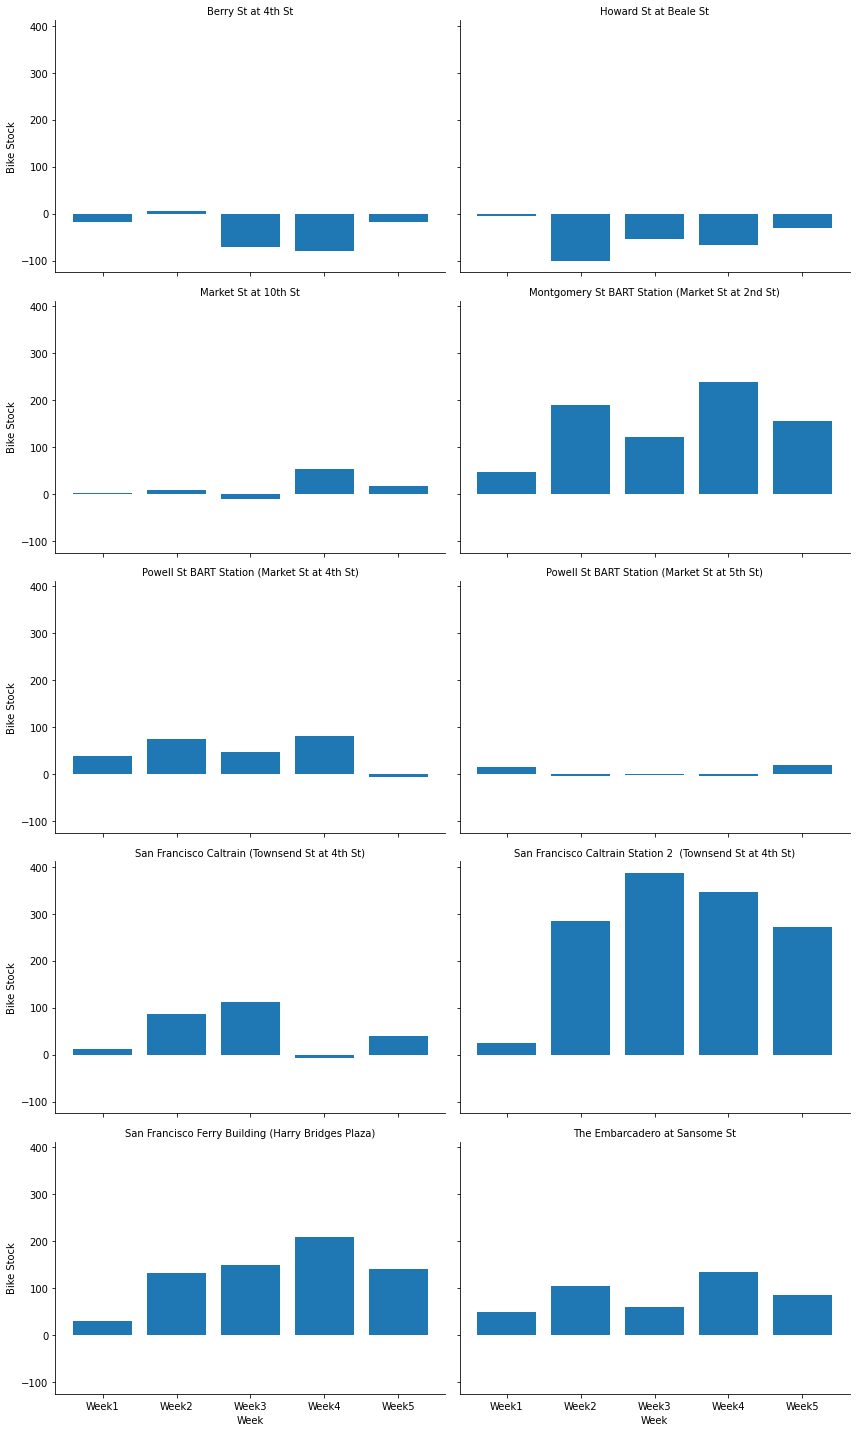

In [113]:
g = sb.FacetGrid(data = df_merged_entry_exit_filter, col = 'station_name', col_wrap = 2, height=4, aspect= 1.5);
g.map(plt.bar, 'week', 'difference');
g.set_axis_labels("Week", "Bike Stock");
g.set_titles(col_template="{col_name}");
plt.xticks([0,1,2,3,4],['Week1', 'Week2', 'Week3', 'Week4', 'Week5']);

`San Francisco Caltrain Station 2` appears to be one of the most crowded in terms of the end location. On the other hand `Howard St at Beale St` seems to be the place where most trips start (we could be wrong since we haven't seen all the charts but this should be a reasonable conclusion). We might consider a mechanism to correct the resulting imbalance. Perhaps give discounts during off-hours to correct imbalances? Off course this should be done for bikes that are currently lying dormant and not subscribed to by any user which restricts our ability towards creating a perfect balance (and this shouldn't be our goal anyway! - since the bike user will use it during the time he has rented it)

**Question:** What trends exist in the renting behavior of customers and subscribers during weekdays, weekends, days of the week, etc?

<a id='weekdayusertype'></a>
### 2.2.5 [Weekday and Weekend Renting Behavior of Customers and Subscribers](#toc)

Figure of merit here is the `start_time` since we are interested in examining the way customers and subscribers rent the bikes. Here we are interested in the proportions and not the absolute counts (since there are more subscribers anyway).

In [114]:
df_bike_sharing_weekday = df_bike_sharing_clean.copy()
df_bike_sharing_weekday['weekday'] = df_bike_sharing_weekday.start_time.dt.weekday
def weekday_classify(x):
    if x <5:
        return "Weekday"
    else:
        return "Weekend"
df_bike_sharing_weekday['day_type'] = [weekday_classify(x) for x in df_bike_sharing_weekday['weekday']]
freq_by_usertype_weekday = df_bike_sharing_weekday.groupby(['day_type','user_type']).size().reset_index()
freq_by_usertype_weekday.columns = ['day_type','user_type','count']
customer_count = df_bike_sharing_clean[df_bike_sharing_clean.user_type == "Customer"].shape[0]
subscriber_count = df_bike_sharing_clean[df_bike_sharing_clean.user_type == "Subscriber"].shape[0]
customer_count, subscriber_count
freq_by_usertype_weekday.loc[0,'count'] = freq_by_usertype_weekday.loc[0,'count']/customer_count
freq_by_usertype_weekday.loc[2,'count'] = freq_by_usertype_weekday.loc[2,'count']/customer_count
freq_by_usertype_weekday.loc[1,'count'] = freq_by_usertype_weekday.loc[1,'count']/subscriber_count
freq_by_usertype_weekday.loc[3,'count'] = freq_by_usertype_weekday.loc[3,'count']/subscriber_count

freq_by_usertype_weekday.rename(columns = {'count':'proportion'}, inplace = True)

A clustered bar chart seems appropriate

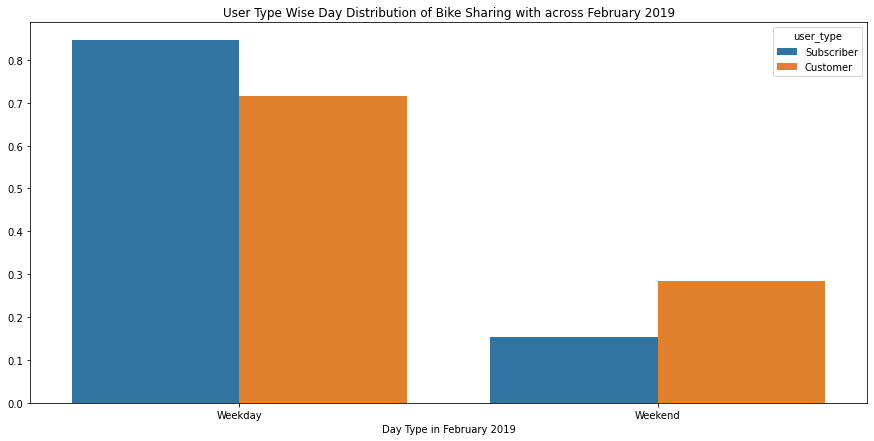

In [115]:
def clustered_bar_plot(size, freq_by_usertype_weekday, x, y, hue, hue_order, xlabel, ylabel, title):
    plt.figure(figsize = size)
    sb.barplot(data=freq_by_usertype_weekday, x = x, y = y, hue = hue, hue_order=hue_order)
    plt.xlabel(xlabel);
    plt.title(title);
    plt.ylabel(ylabel);

clustered_bar_plot([15,7], freq_by_usertype_weekday, 'day_type', 'proportion', 'user_type', ['Subscriber','Customer'], "Day Type in February 2019", '', "User Type Wise Day Distribution of Bike Sharing with across February 2019")

As can be seen a greater proportion of customers use the service in weekends than weekdays. The converse is true for weekdays where a greater proportion of subscribers use the service than customers. The longer duration for customers can perhaps be attributed to this behavior (leisure trips vs trips to work).

<a id='dayusertype'></a>
### 2.2.6 [Day Renting Behavior of Customers and Subscribers](#toc)

In [116]:
freq_by_usertype_day = df_bike_sharing_weekday.groupby(['weekday','user_type']).size().reset_index()
freq_by_usertype_day.columns = ['day','user_type','count']
def to_prop(freq_by_usertype_day):
    cust_prop = freq_by_usertype_day.query('user_type == "Customer"')['count']/customer_count
    sub_prop = freq_by_usertype_day.query('user_type == "Subscriber"')['count']/subscriber_count
    for i in range(freq_by_usertype_day.shape[0]):
        if i % 2 == 0:
            freq_by_usertype_day.loc[i,'count'] = cust_prop[i]
        else:
            freq_by_usertype_day.loc[i,'count'] = sub_prop[i]
    freq_by_usertype_day.columns = ['day','user','proportion']
    return freq_by_usertype_day
freq_by_usertype_day = to_prop(freq_by_usertype_day)

A clustered bar chart can be used to represent the data

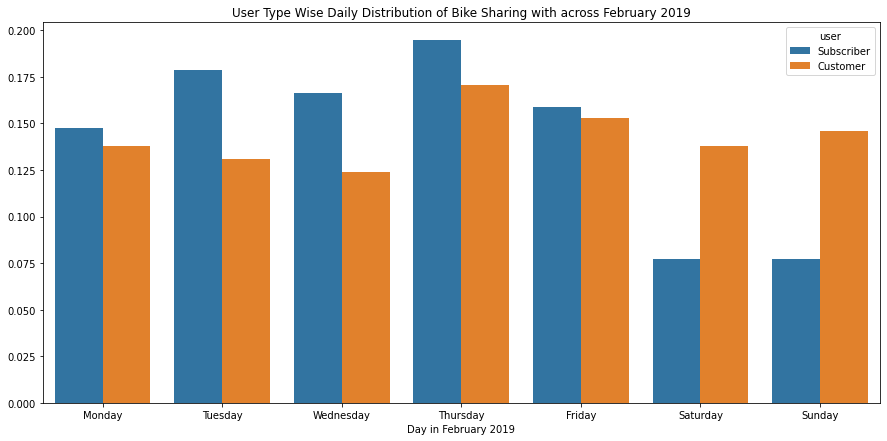

In [117]:
clustered_bar_plot([15,7], freq_by_usertype_day, 'day', 'proportion', 'user', ['Subscriber','Customer'], "Day in February 2019", '', "User Type Wise Daily Distribution of Bike Sharing with across February 2019")

plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

Here again the same pattern emerges where the subscribers use our bike service predominantly on weekdays while customers on weekends

As a small confirmation of our prelimnary conclusions, we can check the hourly behavior of users on weekends. We won't put this as a separate section since this is only for drawing a rough idea about our suppositions 

In [118]:
df_bike_sharing_hols = df_bike_sharing_weekday[df_bike_sharing_weekday.day_type == 'Weekend'].copy()
df_bike_sharing_hols['start_hour'] = df_bike_sharing_hols.start_time.dt.hour
df_bike_sharing_hols['end_hour'] = df_bike_sharing_hols.end_time.dt.hour

freq_by_usertype_shols = df_bike_sharing_hols.groupby(['start_hour','user_type']).size().reset_index()
freq_by_usertype_shols.columns = ['hour','user_type','count']

freq_by_usertype_ehols = df_bike_sharing_hols.groupby(['end_hour','user_type']).size().reset_index()
freq_by_usertype_ehols.columns = ['hour','user_type','count']

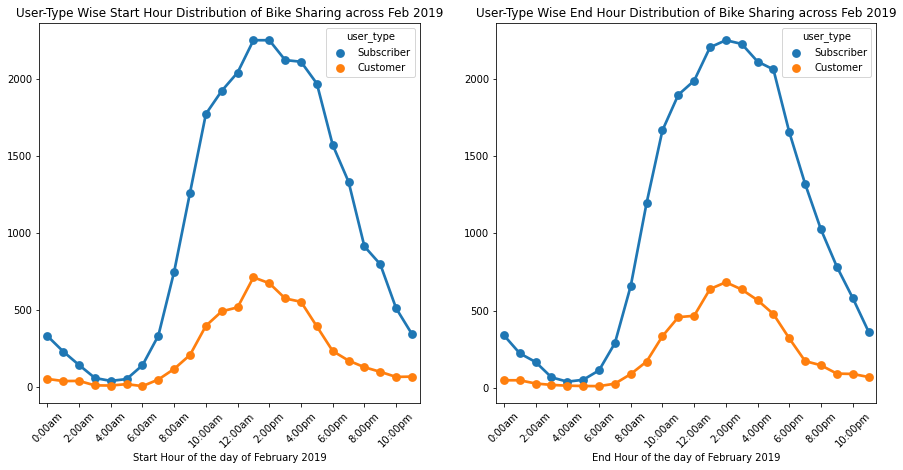

In [119]:
ticks = range(0,24, 2)
tick_labels = [str(tick) + ":00am" if tick<=12 else str(tick-12) + ":00pm" for tick in ticks]

def pointplot_bivariate(freq_by_usertype, x, y, hue, hue_order, xlabel, ylabel, ticks, tick_labels, rotation, title):
    """ Generates bivariate pointplot on given parameters """
    sb.pointplot(data=freq_by_usertype,x = x, y = y, hue = hue, hue_order=hue_order);
    plt.xlabel(xlabel);
    plt.xticks(ticks, tick_labels, rotation = rotation);
    plt.title(title);
    plt.ylabel(ylabel);

plt.figure(figsize = [15,7])
plt.subplot(1,2,1)
pointplot_bivariate(freq_by_usertype_shols, 'hour', 'count', 'user_type', ['Subscriber','Customer'], "Start Hour of the day of February 2019", '', ticks, tick_labels, 45, "User-Type Wise Start Hour Distribution of Bike Sharing across Feb 2019")

plt.subplot(1,2,2)
pointplot_bivariate(freq_by_usertype_ehols, 'hour', 'count', 'user_type', ['Subscriber','Customer'], "End Hour of the day of February 2019", '', ticks, tick_labels, 45, "User-Type Wise End Hour Distribution of Bike Sharing across Feb 2019")

Aaand we were right again! The distribution no longer appears bimodal. We can concur that these trips predominantly would be leisure trips with our users stepping out to enjoy the outside on weekends.

**Question:** Are there certain special leisure spots frequented during weekends away from the routine work areas that causes an increase in duration of bikes rented?

<a id='locationbyday'></a>
### 2.2.7 [Locations of Sites during Weekdays and Weekends](#toc)

In [120]:
def create_location_dataframe(df, df_bike_sharing_clean, station, station_name, station_latitude, station_longitude):
    """ Create an appropriate dataframe for analysing location changes during weekdays and weekends """
    df_filtered = df.groupby(['day_type',station_name]).size().sort_values(ascending=False).reset_index()
    df_filtered.columns = ['day_type', station, 'count']

    # Get coordinates for start station
    latitudes = []
    longitudes = []
    for stat in df_filtered[station]:
        lat = list(df_bike_sharing_clean[df_bike_sharing_clean[station_name] == stat][station_latitude])[0]
        long = list(df_bike_sharing_clean[df_bike_sharing_clean[station_name] == stat][station_longitude])[0]
        latitudes.append(lat)
        longitudes.append(long)

    df_filtered['station_latitude'] = latitudes
    df_filtered['station_longitude'] = longitudes
    return df_filtered

ogn_df_filtered = create_location_dataframe(df_bike_sharing_weekday, df_bike_sharing_clean, 'origin', 'start_station_name', 'start_station_latitude', 'start_station_longitude')
dest_df_filtered = create_location_dataframe(df_bike_sharing_weekday, df_bike_sharing_clean, 'destination', 'end_station_name', 'end_station_latitude', 'end_station_longitude')

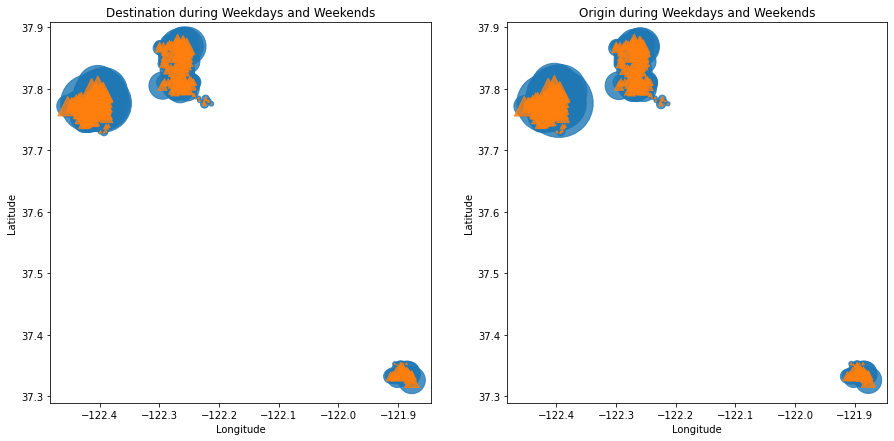

In [121]:
def create_regplot(wtype_markers, df, x, y, ylabel, xlabel, title):
    """ Create a regplot with given parameters"""
    for wtype, marker in wtype_markers:
        plotdata = df[df.day_type == wtype]
        sb.regplot(data = plotdata, x = x, y = y, scatter_kws = {'s': plotdata['count']}, fit_reg = False, marker = marker);
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    plt.title(title);

wtype_markers = [['Weekday','o'],['Weekend','^']]
plt.figure(figsize = [15,7])

plt.subplot(1,2,1)
create_regplot(wtype_markers, ogn_df_filtered, 'station_longitude', 'station_latitude', 'Latitude', 'Longitude', "Destination during Weekdays and Weekends")

plt.subplot(1,2,2)
create_regplot(wtype_markers, dest_df_filtered, 'station_longitude', 'station_latitude', 'Latitude', 'Longitude', "Origin during Weekdays and Weekends")

So we can conclude that there are no 'special' destinations that people travel to during weekends. All weekend destinations seem to correspond to destinations where work is assumed to happen during weekdays. No special inferences can be drawn from this section

<a id='multivariate'></a>
## 2.3 [Multivariate Exploration of Data](#toc)

**Question:** What are the typical user durations by user groups in different hours of the day, different days of the week? 

<a id='udurationhour'></a>
### 2.3.1 [User Type Duration by Hour](#toc)

In [122]:
data_user_hour = pd.pivot_table(df_bike_sharing_hour, values = ['duration_sec'], index = ['Hour'], columns = ['user_type'], aggfunc = np.mean)

A heatmap seems suitable in this case

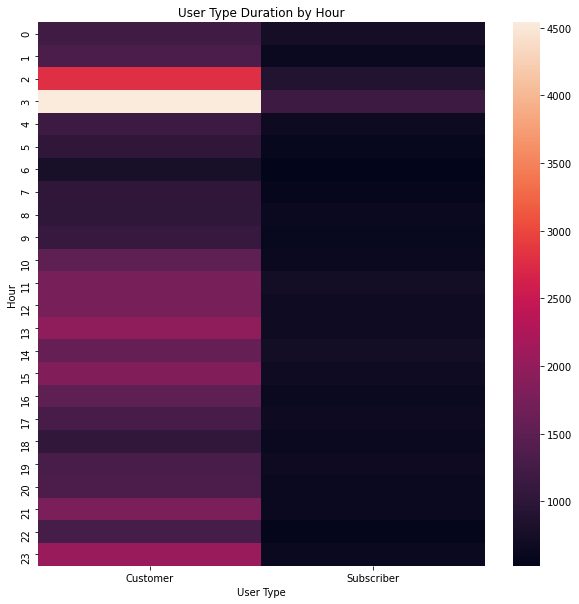

In [123]:
def heatmap_plot(color_palette, size, data, xticks, xtick_labels, title, xlabel):
    sb.color_palette(color_palette)
    fig, ax = plt.subplots(figsize=size)
    sb.heatmap(data);
    plt.xticks(xticks, xtick_labels);
    plt.title(title);
    plt.xlabel(xlabel);

heatmap_plot('viridis_r', (10,10), data_user_hour, [0.5,1.5], ['Customer','Subscriber'], 'User Type Duration by Hour', 'User Type')

Our customers ride longer than our subscribers on average and the activity is seen to spike for riders in the wee hours of the day.

<a id='udurationday'></a>
### 2.3.2 [User Type Duration by Day](#toc)

In [124]:
data_user_day_duration = pd.pivot_table(df_bike_sharing_weekday, values = ['duration_sec'], index = ['weekday'], columns = ['user_type'], aggfunc = np.mean)

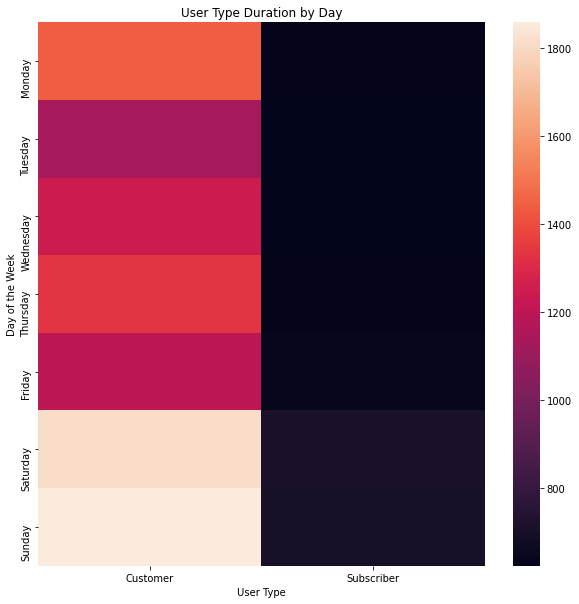

In [125]:
heatmap_plot('viridis_r', (10,10), data_user_day_duration, [0.5,1.5], ['Customer','Subscriber'], 'User Type Duration by Day', 'User Type')

plt.ylabel('Day of the Week')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

Maximum of durations are observed during the weekends from the customers (the subscribers show a somewhat consistent pattern of usage).

**Question:** What are the typical user durations by age groups in different hours of the day, different days of the week?

<a id='agedurationday'></a>
### 2.3.3 [Age Duration by Day](#toc)

In [126]:
df_bike_sharing_age_mod = df_bike_sharing_age.copy()
df_bike_sharing_age_mod['weekday'] = df_bike_sharing_age_mod.start_time.dt.weekday

bins = np.arange(df_bike_sharing_age.member_age.min(), df_bike_sharing_age.member_age.max()+3, 3)
labels = [str(int(bins[x])) + "-" + str(int(bins[x+1])) for x in range(len(list(bins[0:-1])))]

df_bike_sharing_age_mod['age_label'] = pd.cut(df_bike_sharing_age_mod.member_age, bins, labels = labels)

Here again we can make use of the heatmap

In [127]:
data = pd.pivot_table(df_bike_sharing_age_mod, values = ['duration_sec'], index = ['weekday'], columns = ['age_label'], aggfunc = np.mean)

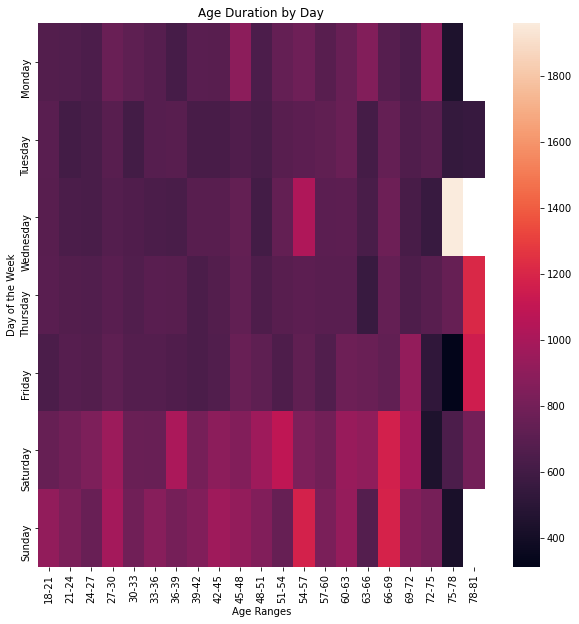

In [128]:
tick_locs = list(range(len(labels)))
tick_locs = [tick_loc + 0.5 for tick_loc in tick_locs]

heatmap_plot('viridis_r', (10,10), data, tick_locs, labels, 'Age Duration by Day', 'Age Ranges')

plt.ylabel('Day of the Week')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

All age groups are more active on weekends with the geriatrics pulling in the longest hours (What?!!). This leads us to suspect that the correct age is not entered for this age range(75-81).

<a id='conclude'></a>
# 3. [Conclude](#toc)
> *The best journeys answer questions that in the beginning you didn't even think to ask*

In this section, we seek to answer and supplement our reasoning with all the conclusions that we have drawn from the given data.

<a id='explain'></a>
## 3.1 [Explanatory Analysis](#toc) 

The one crucial question we seek to answer here is for what exactly does our user base utilise our services. For this the following is proposed:-
1. The `Subscriber` group comprises of working individuals that are likely to use our services for work
2. The `Customer` group comprises of a mixed set of users - although they are more poised to use the service for leisure activities on the weekend than the `Subscriber` group
3. There are certainly nodes where the bike concentration either increases or decreases over the course of the month.

<a id='workandleisure'></a>
### 3.1.1 [Work and Leisure Use Patterns Identified from Data](#toc)

The very first graph that highlights the pattern typical of a workforce is one shown below

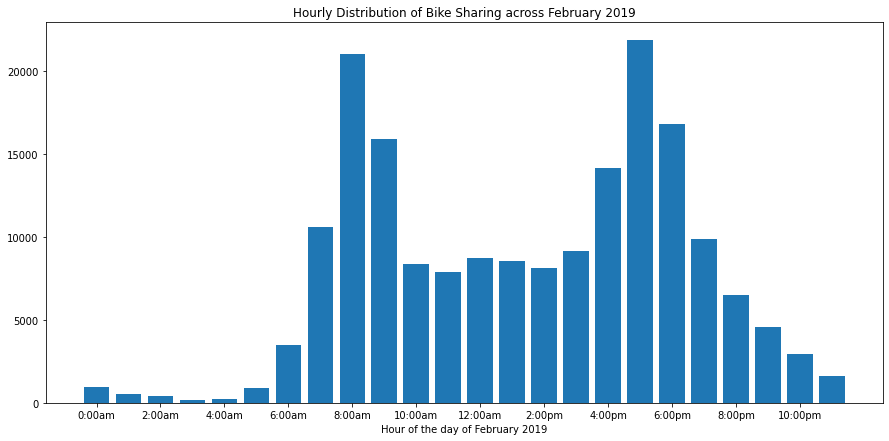

In [129]:
plt.figure(figsize = [15,7])

plt.bar(x = freq_hour_bike.index, height = freq_hour_bike.hour_start);
plt.xlabel("Hour of the day of February 2019");
ticks = range(0,24, 2)
tick_labels = [str(tick) + ":00am" if tick<=12 else str(tick-12) + ":00pm" for tick in ticks]
plt.xticks(ticks, tick_labels, rotation = 0)
plt.title("Hourly Distribution of Bike Sharing across February 2019");

The graph is bimodal with two peaks during rush hours indicative of a predominant use in commuting to and from work. As a matter of fact, the following graph tells us that the demand for our bike falls significantly during weekends.

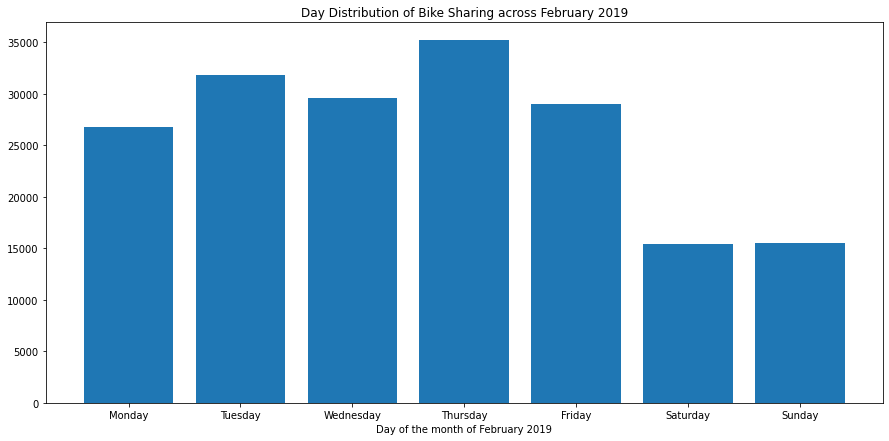

In [130]:
plt.figure(figsize = [15,7])

plt.bar(x = freq_bike.Day, height = freq_bike.Day_Ride_Count);
plt.xlabel("Day of the month of February 2019");

plt.title("Day Distribution of Bike Sharing across February 2019");

This again draws our attention to the fact that we might be catering to a user base comprising a huge proportion of office workers. Another important feature of our data is that the distribution of ages in our dataset matches the demography of a typical workforce population.

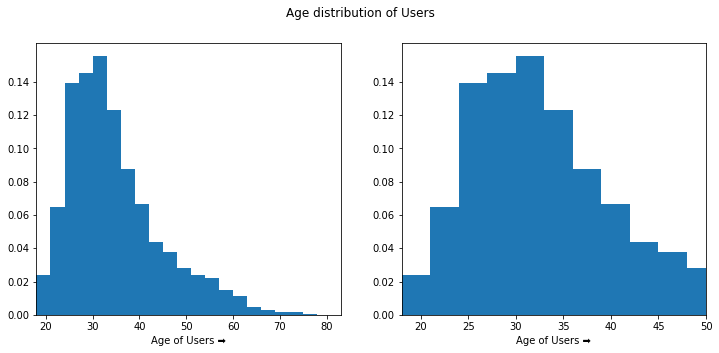

In [131]:
max_prop_age = df_bike_sharing_age.age_bin.value_counts()[0]/df_bike_sharing_age.age_bin.value_counts().sum()
tick_props = np.arange(0, max_prop_age, 0.02)
tick_names = ['{:.2f}'.format(v) for v in tick_props]

plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
histogram(df_bike_sharing_age, 'member_age', bins, 83, 'Age of Users ➡', tick_props, tick_names)

plt.subplot(1,2,2)
histogram(df_bike_sharing_age, 'member_age', bins, 50, 'Age of Users ➡', tick_props, tick_names)

plt.suptitle("Age distribution of Users");

72.63% of our users are between 21-39 years of age which is pretty much the range of ages between which people work at their jobs. All of these seem to indicate a skew towards the possibility of our users using our bikes to commute to work

To identify leisure use patterns, we need to explore some micro-trends in data in different categories

The clustered bar chart below shows that a higher proportion of customers use our services during weekends than the proportion of subscribers.

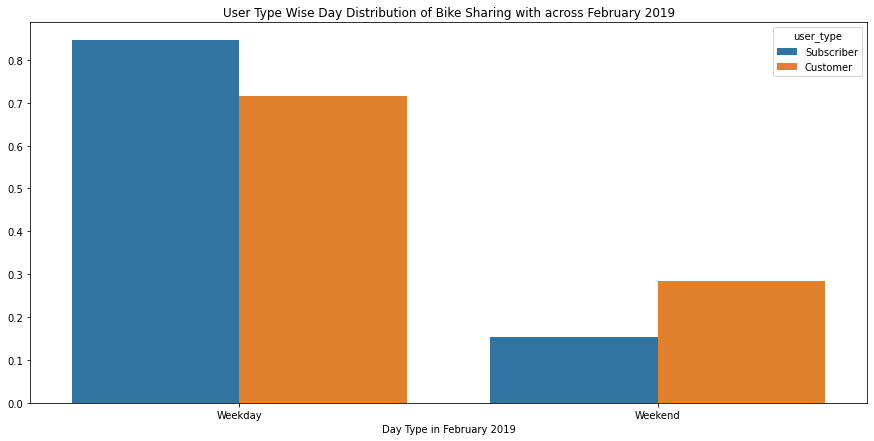

In [132]:
clustered_bar_plot([15,7], freq_by_usertype_weekday, 'day_type', 'proportion', 'user_type', ['Subscriber','Customer'], "Day Type in February 2019", '', "User Type Wise Day Distribution of Bike Sharing with across February 2019")

This coupled with certain other indicators might suggest that we might have more hobbyists among the customers than among the subscribers.

This bar chart reinforces this statement.

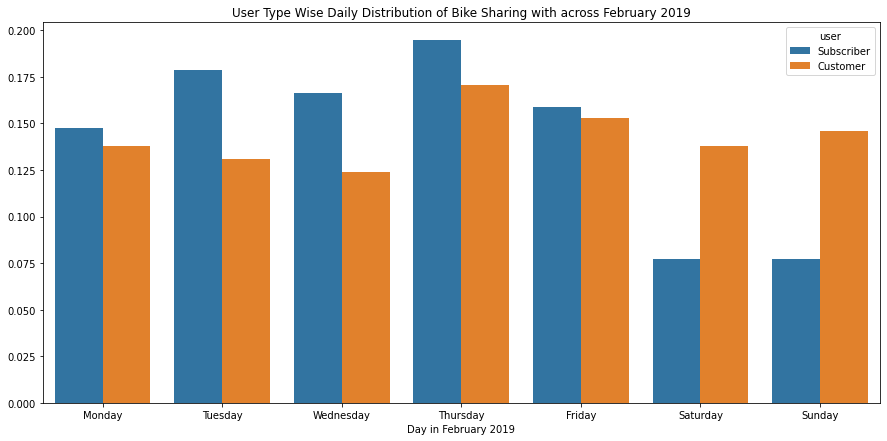

In [133]:
clustered_bar_plot([15,7], freq_by_usertype_day, 'day', 'proportion', 'user', ['Subscriber','Customer'], "Day in February 2019", '', "User Type Wise Daily Distribution of Bike Sharing with across February 2019")

plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

To confirm our presupposition that mostly leisurely activities occur during weekends, the following plots have been generated

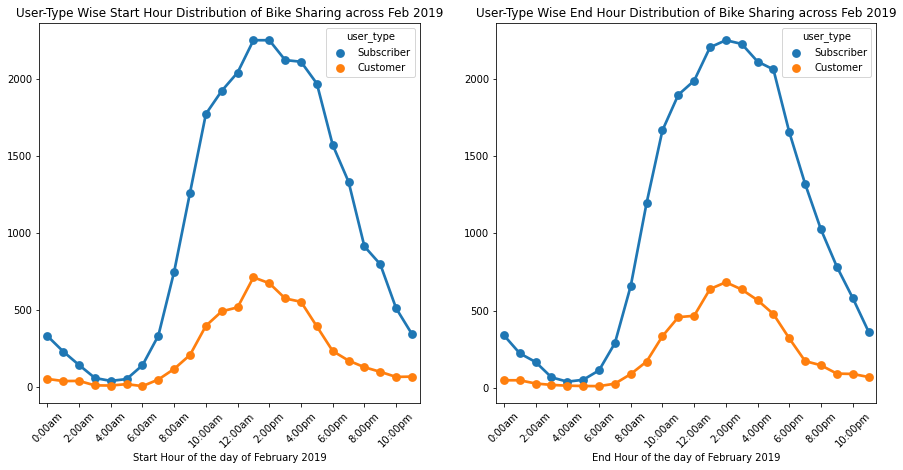

In [134]:
plt.figure(figsize = [15,7])
plt.subplot(1,2,1)
pointplot_bivariate(freq_by_usertype_shols, 'hour', 'count', 'user_type', ['Subscriber','Customer'], "Start Hour of the day of February 2019", '', ticks, tick_labels, 45, "User-Type Wise Start Hour Distribution of Bike Sharing across Feb 2019")

plt.subplot(1,2,2)
pointplot_bivariate(freq_by_usertype_ehols, 'hour', 'count', 'user_type', ['Subscriber','Customer'], "End Hour of the day of February 2019", '', ticks, tick_labels, 45, "User-Type Wise End Hour Distribution of Bike Sharing across Feb 2019")

We no longer see the bimodal characteristic of the weekdays implying that our assumption was correct. Furthermore, it also supplements our initial assumption that our `Customer` group has more hobbyists than our `Subscriber` group.

As a final check we have also plotted a heatmap as follows

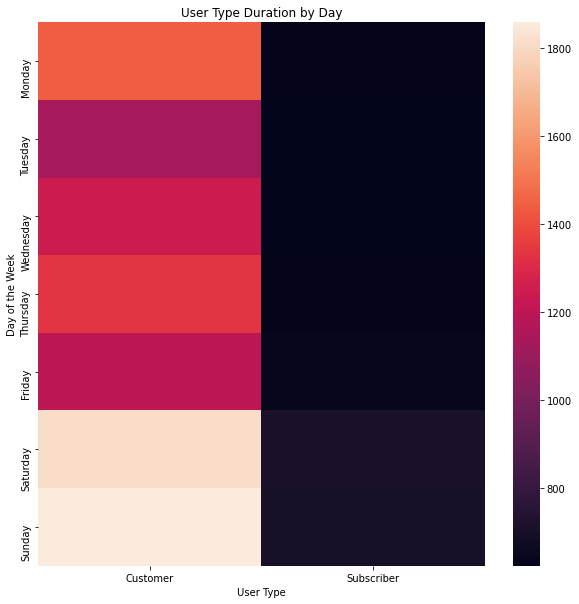

In [135]:
heatmap_plot('viridis_r', (10,10), data_user_day_duration, [0.5,1.5], ['Customer','Subscriber'], 'User Type Duration by Day', 'User Type')

plt.ylabel('Day of the Week')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

This heatmap reveals an interesting aspect that fits in with our intuitive understanding of leisure trips - they tend to be longer than the routine. Both `Customer` and `Subscriber` groups have longer trip duration on weekends (`Customer` group even more so!). This implies that our assumption about the nature of trip is correct.

We have thus validated two of our three conclusions - the `Subscriber` group comprising of predominantly working individuals
and the `Customer` group comprising a mixed set of users more prone to use our service for leisure activities on the weekend than the `Subscriber` group.

<a id='bikestockpile'></a>
### 3.1.2 [Bike Stockpiles Across Most Frequent Stations during the Month](#toc)

In this section we will be validating the accumulation or deficit of bikes at the most frequent stations in the dataset in different weeks during the month.

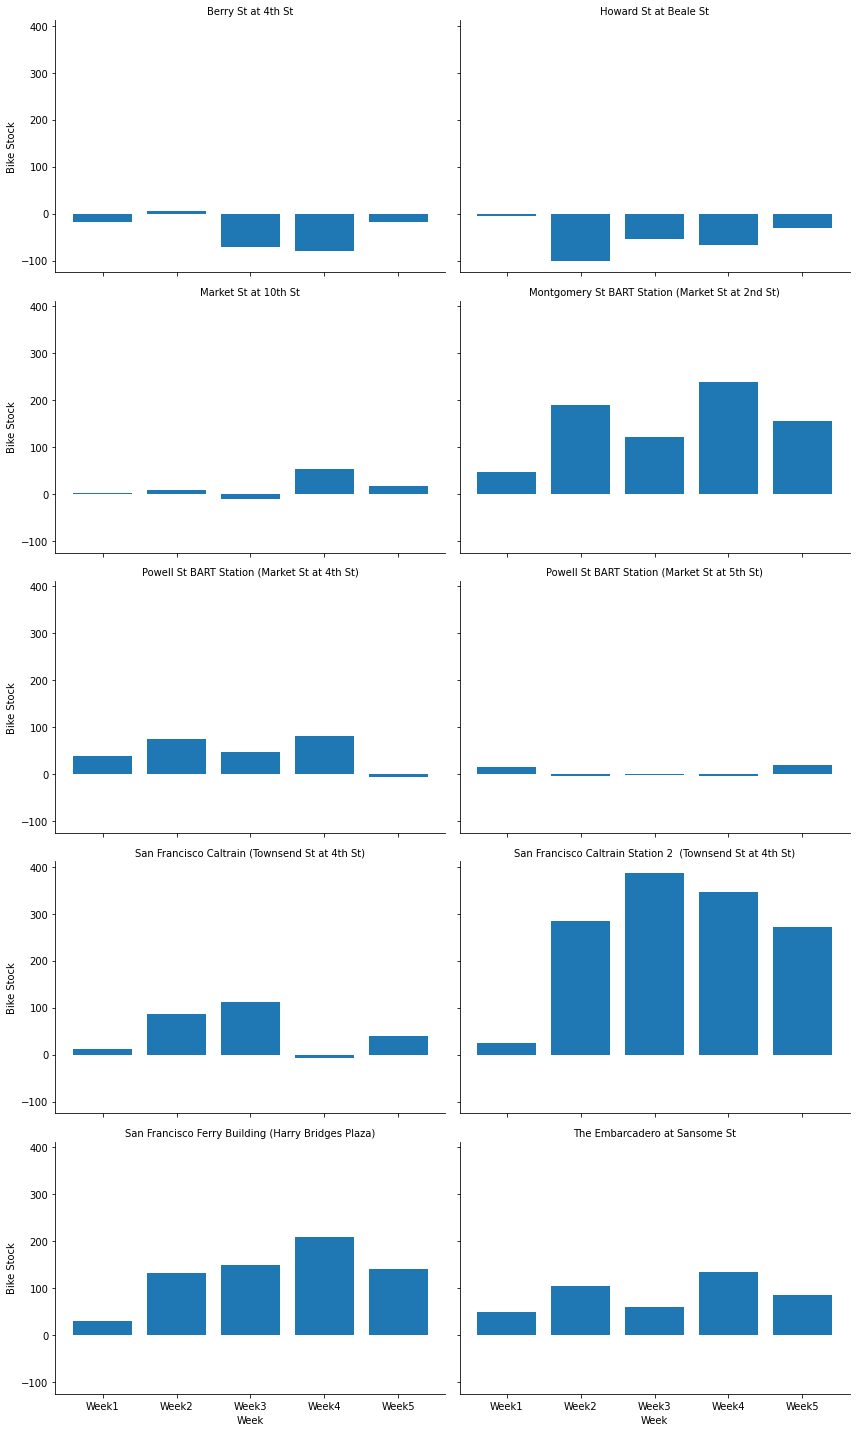

In [136]:
g = sb.FacetGrid(data = df_merged_entry_exit_filter, col = 'station_name', col_wrap = 2, height=4, aspect= 1.5);
g.map(plt.bar, 'week', 'difference');
g.set_axis_labels("Week", "Bike Stock");
g.set_titles(col_template="{col_name}");
plt.xticks([0,1,2,3,4],['Week1', 'Week2', 'Week3', 'Week4', 'Week5']);

Notice how accumulation of bikes at a station leads to greater accumulation in the subsequent weeks till somehow we observe a drop? We might consider trying to create some sort of equilibrium faster in order to ensure a healthy supply of bikes at the stations. This could be achieved by offering heavy discounts on less frequented routes to our users in hope that they might consider travelling on those routes during their leisure rides. This would benefit them too by enabling them to explore more of the city!! (we might articulate our proposal in our push notification as follows - "Travel the road less travelled at a great price!! Aye, it truly does make a difference.")